In [84]:
# global import
import sys, os
import numpy as np
from spatialmath import base, SE3
import spatialmath as spm
from roboticstoolbox.robot import *
from roboticstoolbox import *
import csv
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.path.abspath(os.path.join('..'))))
print(sys.path)
# lockal import
from robopainter_kinematic.KUKAKR6_R900_2_AnalyticalKinematics import KUKAKR6_R900_2_AnalyticalKinematics

['/home/keks1101/Documents/Projects/Test-painter/robopainter_common/scripts/skip_stroke_fix', '', '/opt/ros/melodic/lib/python2.7/dist-packages', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '/home/keks1101/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/home/keks1101/.local/lib/python3.8/site-packages/IPython/extensions', '/home/keks1101/.ipython', '/home/keks1101/Documents/Projects', '/home/keks1101/Documents/Projects/Test-painter', '/home/keks1101/Documents/Projects/Test-painter', '/home/keks1101/Documents/Projects/Test-painter', '/home/keks1101/Documents/Projects/Test-painter/robopainter_common', '/home/keks1101/Documents/Projects/Test-painter/robopainter_common/robopainter_kinematic', '/home/keks1101/Documents/Projects/Test-painter/robopainter_common', '/home/keks1101/Documents/Projects/Test-painter/robopainter_common', '/home/keks1101/Documents/Projects/Test-painter/robopainter_

In [85]:
min = 0.0982
max = 0.153

n = 6
offset = np.array([0, 0, -np.pi/2, 0, 0, 0], float)
alpha = np.array([np.pi/2, 0, np.pi/2, -np.pi/2, np.pi/2, np.pi], float)
a = np.array([0.025, 0.455, 0.025, 0, 0, 0], float)
d = np.array([-0.4, 0, 0, -0.42, 0, -0.09], float)

joint_limits = (np.array([[-170.0*np.pi/180.0, 170.0*np.pi/180.0],
                          [-190.0*np.pi/180.0,  45.0*np.pi/180.0],
                          [-120.0*np.pi/180.0, 156.0*np.pi/180.0],
                          [-185.0*np.pi/180.0, 185.0*np.pi/180.0],
                          [-120.0*np.pi/180.0, 120.0*np.pi/180.0],
                          [-350.0*np.pi/180.0, 350.0*np.pi/180.0]], float))

robot = KUKAKR6_R900_2_AnalyticalKinematics(n, offset, a, d, alpha, joint_limits)

flags = np.array([0, 1, 1])

gripper = 0.1444
tf_brush_min = np.array([[1., 0., 0.,  0.],
                         [0., 1., 0.,  0.],
                         [0., 0., 1., min + gripper],
                         [0., 0., 0.,  1.]])

tf_brush_max = np.array([[1., 0., 0.,  0.],
                         [0., 1., 0.,  0.],
                         [0., 0., 1., max + gripper],
                         [0., 0., 0.,  1.]])


box = [np.arange(0, 0.9, 0.05), np.arange(-0.75, 1.1, 0.05), np.arange(-0.75, 1.1, 0.05)]

orientaion = [[0, -np.pi/6, np.pi], [0, np.pi/6, -5*np.pi/6], [0, np.pi/6, 5*np.pi/6], [0, np.pi/6, np.pi]]


In [36]:
flags = np.array([0, 1, 1])
data_1 = np.array([[]])
ok = [0,0,0,0]
c0_1 = 0
c1_1 = 0
for h in range(len(box[0])):
    print(h/len(box[0]))
    for l in range(len(box[1])):
        for w in range(len(box[2])):
            for o in range(len(orientaion)):
                tf = spm.SE3(box[2][w], box[1][l], box[0][h]) @ spm.SE3.RPY(orientaion[o], order='xyz')
                solution_min = robot.inverse_kinematic(tf, flags, tf_brush_min)
                solution_max = robot.inverse_kinematic(tf, flags, tf_brush_max)
                ok[o] = solution_min[1]*solution_max[1]
                if (solution_min[1] and solution_max[1]):
                    c1_1 = c1_1 + 1
                else:
                    c0_1 = c0_1 + 1
#                 print(h, c0_1, c1_1)
            OK_all = ok[0]*ok[3]*ok[1]*ok[2]
            if (h==0)&(l==0)&(w==0):
                data_1 = np.append(data_1, [[box[2][w], box[1][l], box[0][h], OK_all]], axis=1)
            else:
                data_1 = np.append(data_1, [[box[2][w], box[1][l], box[0][h], OK_all]], axis=0)
            with open("../box_area_online_flags1_all.csv", "a") as file:
                writer = csv.writer(file, delimiter=",")
                writer.writerow([box[2][w], box[1][l], box[0][h], str(OK_all)])

0.0
0.05555555555555555
0.1111111111111111
0.16666666666666666
0.2222222222222222
0.2777777777777778
0.3333333333333333
0.3888888888888889
0.4444444444444444
0.5
0.5555555555555556
0.6111111111111112
0.6666666666666666
0.7222222222222222
0.7777777777777778
0.8333333333333334
0.8888888888888888
0.9444444444444444


In [57]:
data_1_ok = np.array([[0,0,0,0]])
data_1_not = np.array([[0,0,0,0]])
for i in range(data_1.shape[0]):
    if data_1[i,3] == 1:
        data_1_ok = np.append(data_1_ok, [data_1[i,:]], axis=0)
    else:
        data_1_not = np.append(data_1_not, [data_1[i,:]], axis=0)

<IPython.core.display.Javascript object>


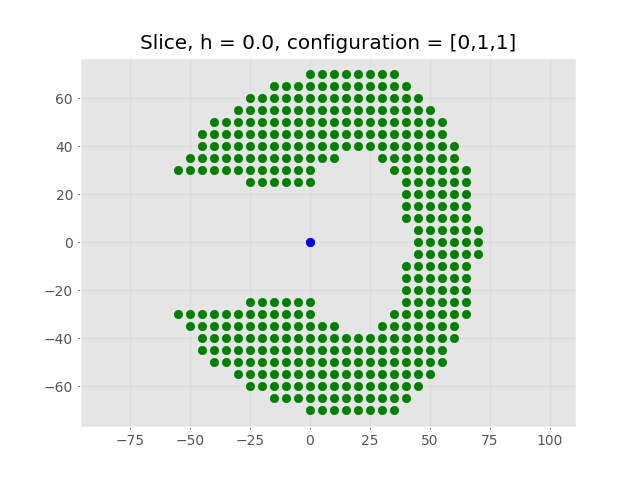

In [109]:
data_h0 = data_1_ok[(data_1_ok[:,2]<0.001)&(data_1_ok[:,2]>-0.001),:]
fig = plt.figure()
plt.scatter(data_h0[:,0]*100, data_h0[:,1]*100, color = "green")
plt.scatter([0.0], [0.0], color = "blue")
plt.title("Slice, h = 0.0, configuration = [0,1,1]")
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


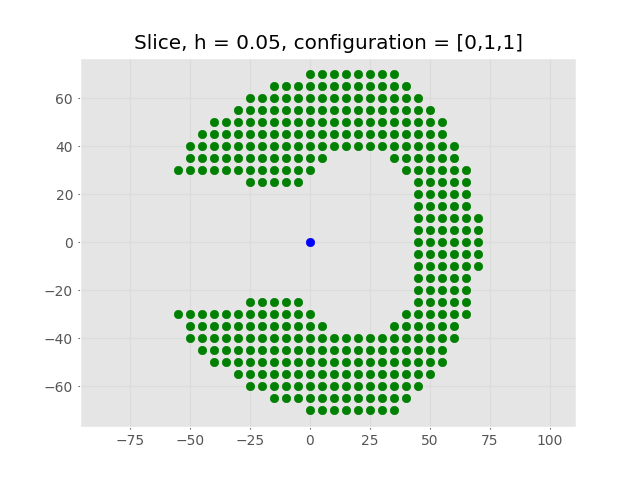

In [112]:
data_h0 = data_1_ok[(data_1_ok[:,2]<0.06)&(data_1_ok[:,2]>0.04),:]
fig = plt.figure()
plt.scatter(data_h0[:,0]*100, data_h0[:,1]*100, color = "green")
plt.scatter([0.0], [0.0], color = "blue")
plt.title("Slice, h = 0.05, configuration = [0,1,1]")
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


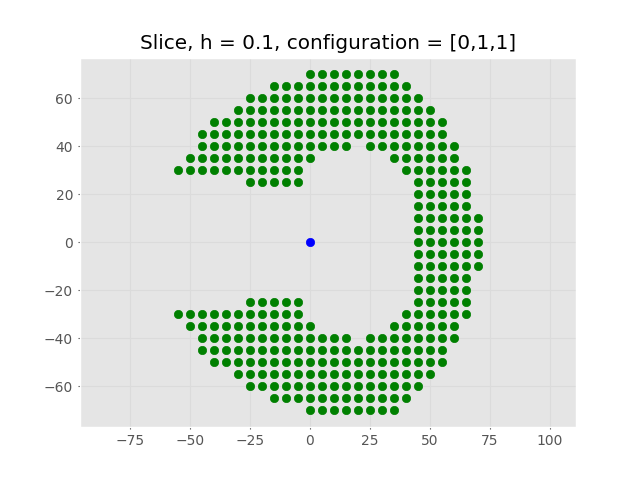

In [113]:
data_h0 = data_1_ok[(data_1_ok[:,2]<0.11)&(data_1_ok[:,2]>0.06),:]
fig = plt.figure()
plt.scatter(data_h0[:,0]*100, data_h0[:,1]*100, color = "green")
plt.scatter([0.0], [0.0], color = "blue")
plt.title("Slice, h = 0.1, configuration = [0,1,1]")
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


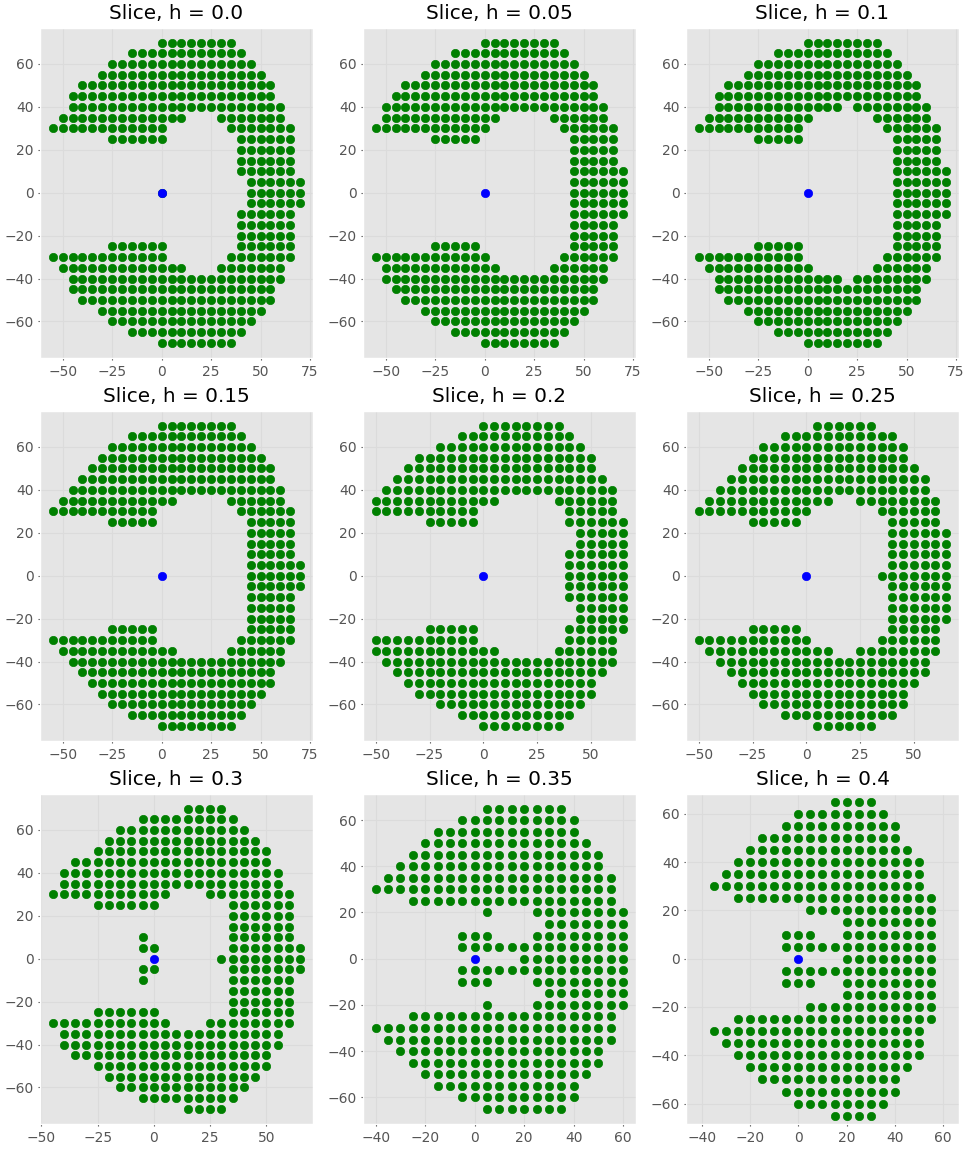

In [125]:
axs = plt.figure(constrained_layout=True).subplots(3, 3)
axs = trim_axs(axs, len(cases))
cases = [0, 1, 2, 3, 4, 5, 6, 7, 8]
for ax, case in zip(axs, cases):
    data_h0 = data_1_ok[(data_1_ok[:,2]<(case*0.05 + 0.01))&(data_1_ok[:,2]>(case*0.05 - 0.01)),:]
    ax.set_title('Slice, h = %s' % str(round(case*0.05,3)))
    ax.scatter(data_h0[:,0]*100, data_h0[:,1]*100, color = "green")
    ax.scatter([0.0], [0.0], color = "blue")
# plt.title("Slice, h = 0.15, configuration = [0,1,1]")
    plt.axis('equal')
plt.show()

In [119]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

In [67]:
flags = np.array([0, 1, -1])
data_2 = np.array([[]])
ok = [0,0,0,0]
c0_2 = 0
c1_2 = 0
for h in range(len(box[0])):
    print(h/len(box[0]))
    for l in range(len(box[1])):
        for w in range(len(box[2])):
            for o in range(len(orientaion)):
                tf = spm.SE3(box[2][w], box[1][l], box[0][h]) @ spm.SE3.RPY(orientaion[o], order='xyz')
                solution_min = robot.inverse_kinematic(tf, flags, tf_brush_min)
                solution_max = robot.inverse_kinematic(tf, flags, tf_brush_max)
                ok[o] = solution_min[1]*solution_max[1]
                if (solution_min[1] and solution_max[1]):
                    c1_2 = c1_2 + 1
                else:
                    c0_2 = c0_2 + 1
#                 print(h, c0_2, c1_2)
            OK_all = ok[0]*ok[3]*ok[1]*ok[2]
            if (h==0)&(l==0)&(w==0):
                data_2 = np.append(data_2, [[box[2][w], box[1][l], box[0][h], OK_all]], axis=1)
            else:
                data_2 = np.append(data_2, [[box[2][w], box[1][l], box[0][h], OK_all]], axis=0)
            with open("../box_area_online_flags2_all.csv", "a") as file:
                writer = csv.writer(file, delimiter=",")
                writer.writerow([box[2][w], box[1][l], box[0][h], str(OK_all)])

0.0
0.05555555555555555
0.1111111111111111
0.16666666666666666
0.2222222222222222
0.2777777777777778
0.3333333333333333
0.3888888888888889
0.4444444444444444
0.5
0.5555555555555556
0.6111111111111112
0.6666666666666666
0.7222222222222222
0.7777777777777778
0.8333333333333334
0.8888888888888888
0.9444444444444444


In [79]:
data_2_ok = np.array([[0,0,0,0]])
data_2_not = np.array([[0,0,0,0]])
for i in range(data_2.shape[0]):
    if data_2[i,3] == 1:
        data_2_ok = np.append(data_2_ok, [data_2[i,:]], axis=0)
    else:
        data_2_not = np.append(data_2_not, [data_2[i,:]], axis=0)

In [105]:
data_h0 = data_2_ok[(data_2_ok[:,2]<0.001)&(data_2_ok[:,2]>-0.001),:]
fig = plt.figure()
plt.scatter(data_h0[:,0]*100, data_h0[:,1]*100, color = "green")
plt.scatter([0.0], [0.0], color = "blue")
plt.xticks([-75:5:75])
plt.yticks([-75:5:75])
plt.title("Slice, h = 0.0, configuration = [0,1,-1]")
plt.axis('equal')
plt.show()

SyntaxError: invalid syntax (2830937180.py, line 5)

<IPython.core.display.Javascript object>


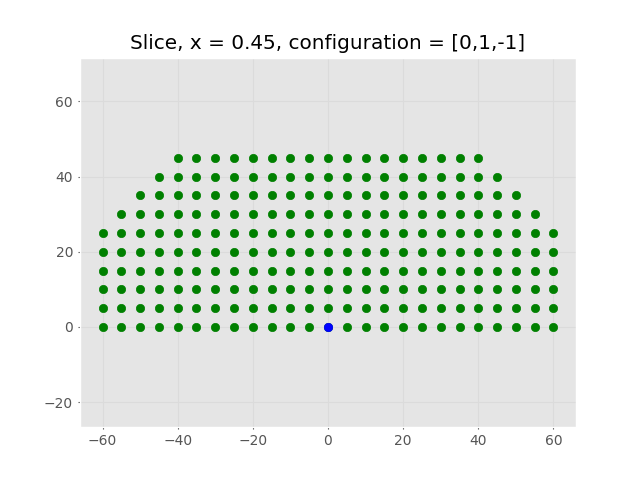

In [106]:
data_x04 = data_2_ok[(data_2_ok[:,0]<0.46)&(data_2_ok[:,0]>0.41),:]
fig = plt.figure()
plt.scatter(data_x04[:,1]*100, data_x04[:,2]*100, color = "green")
plt.scatter([0.0], [0.0], color = "blue")
plt.title("Slice, x = 0.45, configuration = [0,1,-1]")
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


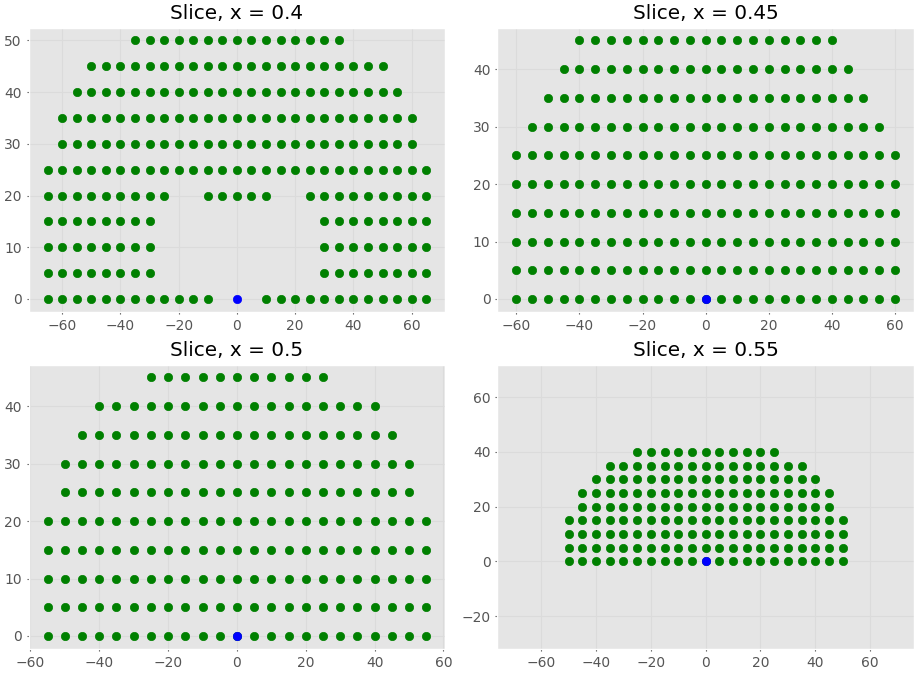

In [128]:
axs = plt.figure(constrained_layout=True).subplots(2, 2)
axs = trim_axs(axs, len(cases))
cases = [8, 9, 10, 11]
for ax, case in zip(axs, cases):
    data_x04 = data_2_ok[(data_2_ok[:,0]<(case*0.05 + 0.01))&(data_2_ok[:,0]>(case*0.05 - 0.01)),:]
    ax.set_title('Slice, x = %s' % str(round(case*0.05,3)))
    ax.scatter(data_x04[:,1]*100, data_x04[:,2]*100, color = "green")
    ax.scatter([0.0], [0.0], color = "blue")
# plt.title("Slice, h = 0.15, configuration = [0,1,1]")
    plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


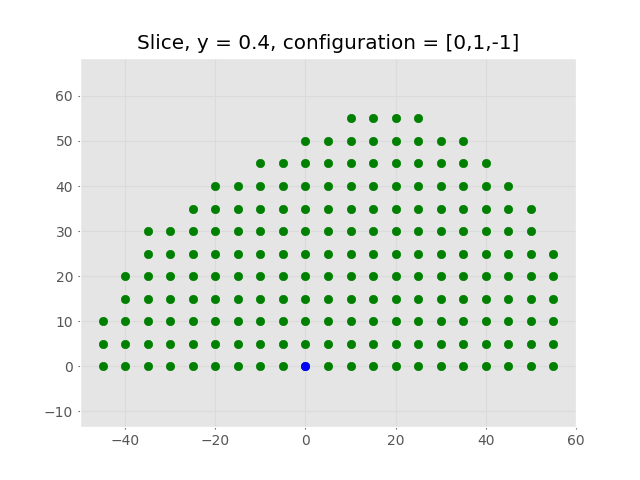

In [108]:
data_y04 = data_2_ok[(data_2_ok[:,1]<0.46)&(data_2_ok[:,1]>0.41),:]
fig = plt.figure()
plt.scatter(data_y04[:,0]*100, data_y04[:,2]*100, color = "green")
plt.scatter([0.0], [0.0], color = "blue")
plt.title("Slice, y = 0.4, configuration = [0,1,-1]")
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


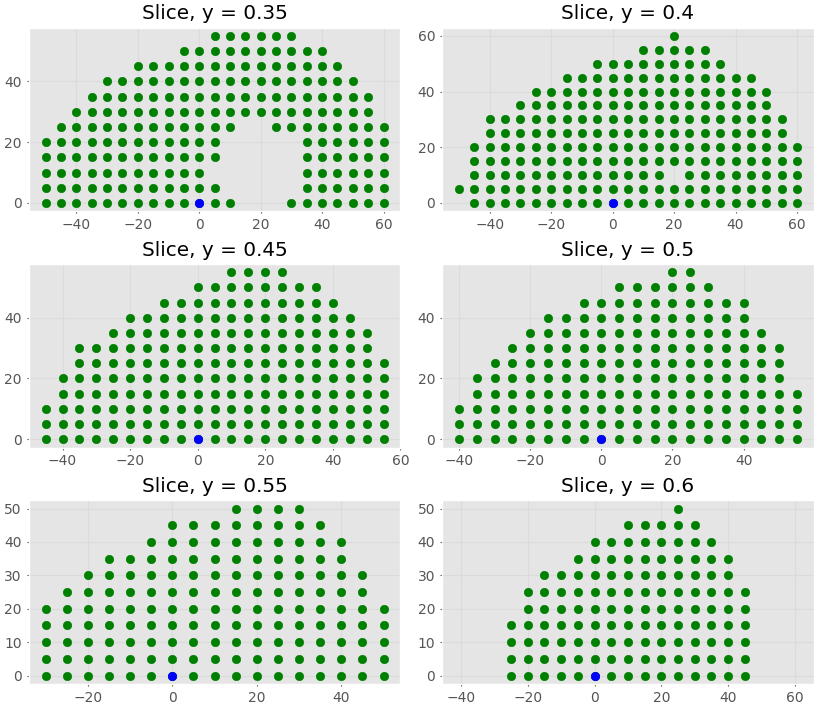

In [132]:
axs = plt.figure(constrained_layout=True).subplots(3, 2)
axs = trim_axs(axs, len(cases))
cases = [7, 8, 9, 10, 11, 12]
for ax, case in zip(axs, cases):
    data_y04 = data_2_ok[(data_2_ok[:,1]<(case*0.05 + 0.01))&(data_2_ok[:,1]>(case*0.05 - 0.01)),:]
    ax.set_title('Slice, y = %s' % str(round(case*0.05,3)))
    ax.scatter(data_y04[:,0]*100, data_y04[:,2]*100, color = "green")
    ax.scatter([0.0], [0.0], color = "blue")
# plt.title("Slice, h = 0.15, configuration = [0,1,1]")
    plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


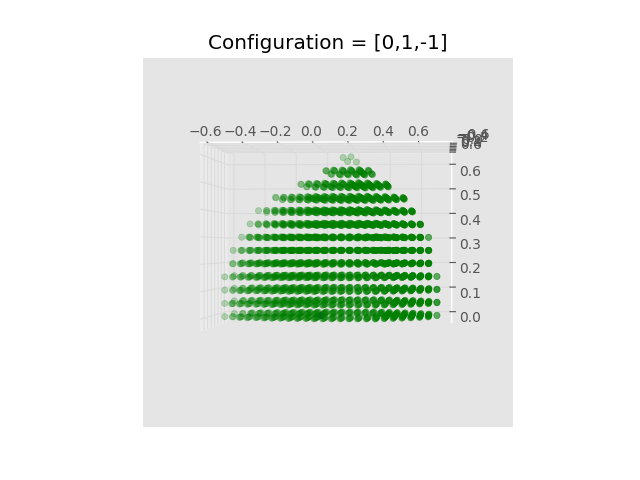

AttributeError: 'Axes3DSubplot' object has no attribute 'xlabel'

In [102]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_2_ok[:,0],data_2_ok[:,1],data_2_ok[:,2], color = "green", alpha = 0.25)
# ax.scatter(data_1_ok[:,0],data_1_ok[:,1],data_1_ok[:,2], color = "yellow", alpha = 0.25)
ax.scatter([0.0], [0.0], [0.0], color = "blue")
plt.title("Configuration = [0,1,-1]")
ax.xlabel('x')
ax.ylabel('y')
ax.zlabel('z')
plt.show()

In [86]:
flags = np.array([1, -1, -1])
data_3 = np.array([[]])
ok = [0,0,0,0]
c0_3 = 0
c1_3 = 0
for h in range(len(box[0])):
    print(h/len(box[0]))
    for l in range(len(box[1])):
        for w in range(len(box[2])):
            for o in range(len(orientaion)):
                tf = spm.SE3(box[2][w], box[1][l], box[0][h]) @ spm.SE3.RPY(orientaion[o], order='xyz')
                solution_min = robot.inverse_kinematic(tf, flags, tf_brush_min)
                solution_max = robot.inverse_kinematic(tf, flags, tf_brush_max)
                ok[o] = solution_min[1]*solution_max[1]
                if (solution_min[1] and solution_max[1]):
                    c1_3 = c1_3 + 1
                else:
                    c0_3 = c0_3 + 1
#                 print(h, c0_2, c1_2)
            OK_all = ok[0]*ok[3]*ok[1]*ok[2]
            if (h==0)&(l==0)&(w==0):
                data_3 = np.append(data_3, [[box[2][w], box[1][l], box[0][h], OK_all]], axis=1)
            else:
                data_3 = np.append(data_3, [[box[2][w], box[1][l], box[0][h], OK_all]], axis=0)
            with open("../box_area_online_flags3_all.csv", "a") as file:
                writer = csv.writer(file, delimiter=",")
                writer.writerow([box[2][w], box[1][l], box[0][h], str(OK_all)])

0.0
0.05555555555555555
0.1111111111111111
0.16666666666666666
0.2222222222222222
0.2777777777777778
0.3333333333333333
0.3888888888888889
0.4444444444444444
0.5
0.5555555555555556
0.6111111111111112
0.6666666666666666
0.7222222222222222
0.7777777777777778
0.8333333333333334
0.8888888888888888
0.9444444444444444


In [92]:
data_3_ok = np.array([[0,0,0,0]])
data_3_not = np.array([[0,0,0,0]])
for i in range(data_3.shape[0]):
    if data_3[i,3] == 1:
        data_3_ok = np.append(data_3_ok, [data_3[i,:]], axis=0)
    else:
        data_3_not = np.append(data_3_not, [data_3[i,:]], axis=0)

<IPython.core.display.Javascript object>


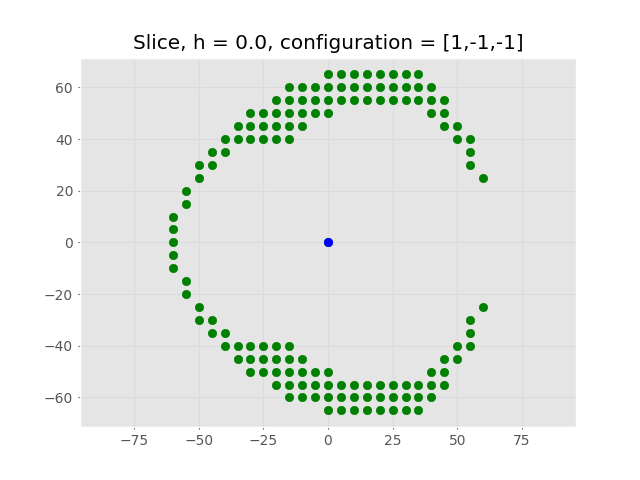

In [94]:
data_h0 = data_3_ok[(data_3_ok[:,2]<0.001)&(data_3_ok[:,2]>-0.001),:]
fig = plt.figure()
plt.scatter(data_h0[:,0]*100, data_h0[:,1]*100, color = "green")
plt.scatter([0.0], [0.0], color = "blue")
plt.title("Slice, h = 0.0, configuration = [1,-1,-1]")
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


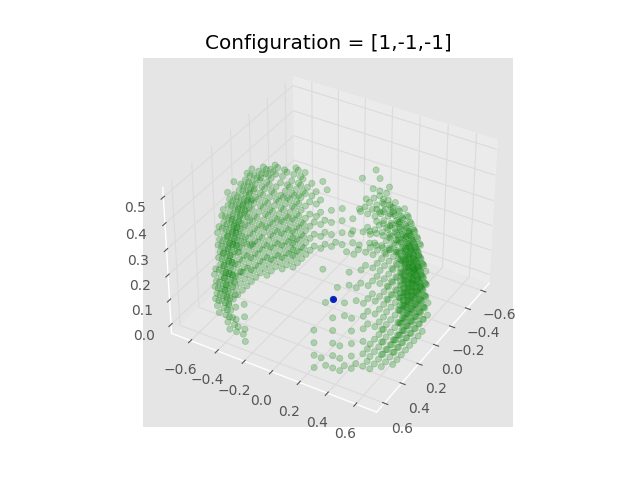

In [93]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_3_ok[:,0],data_3_ok[:,1],data_3_ok[:,2], color = "green", alpha = 0.25)
ax.scatter([0.0], [0.0], [0.0], color = "blue")
plt.title("Configuration = [1,-1,-1]")
plt.show()